### Data analysis for comparing the results of Smp-UNet Pipeline with Groundtruth for Seed count and Feature extraction.
#### Author: Harpreet Kaur Bargota

In [150]:
# import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from statsmodels.stats.api import DescrStatsW
from scipy.stats import linregress
from sklearn.metrics import r2_score
import statsmodels.api as sm
warnings.filterwarnings(action='ignore')

In [151]:
# read the groundtruth data (Aug data) provided by Dr. Nicholas Larkan 
Aug_data = pd.read_excel("../../helper_scripts/Groundtruth_data/Faba_Seed_Analyzer_Data_August_2024.xlsx", sheet_name="Mean S2 Seed Data")
Aug_data.head(5)

,ID,Main Seed,Main Seeds,Weight(g),TGW(g),Seeds/kg,"""B-Stocking""/Non-Seeds",Date,Time,ØArea,...,Max Width,Max Length,Volume(ml),Volume Weight(kg/hl),ØCircularity,Min Circularity,Max Circularity,ØL/W Ratio,Min L/W Ratio,Max L/W Ratio
0,Vf1-1-2,Vicia faba,4,4.8877,1221.925000,818.380834,8,13/06/2023,14:38,219.500247,...,14.532204,21.097440,15,32.584667,1.168153,1.162423,1.173740,1.368314,1.291562,1.451772
1,Vf4-1-1,Vicia faba,6,1.9316,321.933333,3106.233175,7,13/06/2023,14:40,54.012175,...,8.224431,10.592581,15,12.877333,1.145160,1.126615,1.155499,1.238091,1.169780,1.294690
2,Vf7-1-1,Vicia faba,10,3.5681,356.810000,2802.612034,9,13/06/2023,14:42,65.235907,...,8.462456,11.367768,15,23.787333,1.164687,1.135995,1.187734,1.351447,1.251236,1.429181
3,Vf8-1-1,Vicia faba,9,3.8984,433.155556,2308.639442,9,13/06/2023,14:43,70.955747,...,9.208415,12.489041,15,25.989333,1.161806,1.151720,1.179324,1.317772,1.249530,1.399287
4,Vf9-1-1,Vicia faba,10,4.5645,456.450000,2190.820462,11,13/06/2023,14:45,77.492095,...,9.354255,13.390670,15,30.430000,1.194822,1.167892,1.263545,1.460535,1.374786,1.620578


In [152]:
# Extract the df containing only ID, MAin seeds
col_list = ['ID', 'Main Seeds']
Org_Seeds = Aug_data[col_list]
Org_Seeds.head(2)

,ID,Main Seeds
0,Vf1-1-2,4
1,Vf4-1-1,6


In [154]:
# read the .csv file containing the seed count data 
from pathlib import Path

cwd = Path().resolve()
# 1️⃣ Find the folder named "Smp-UNet Pipeline" in the parent directory tree
pipeline_dirs = [
    p for p in cwd.parent.rglob("Smp-UNet Pipeline")
    if p.is_dir()
]
pipeline_dir = pipeline_dirs[0]
# 2️⃣ Find seed_count.csv inside that folder
csv_matches = list(pipeline_dir.rglob("seed_count.csv"))
csv_path = csv_matches[0]
# 3️⃣ Read the CSV
seed2 = pd.read_csv(csv_path)
seed2.head(2)

,class,seed_count
0,Faba-Seed-CC_Vf257-1-1,5
1,Faba-Seed-CC_Vf115-1-2,10


In [155]:
# add the string before the string- ID
Org_Seeds['ID'] = 'Faba-Seed-CC_' + Org_Seeds['ID']
Org_Seeds.head(4)

,ID,Main Seeds
0,Faba-Seed-CC_Vf1-1-2,4
1,Faba-Seed-CC_Vf4-1-1,6
2,Faba-Seed-CC_Vf7-1-1,10
3,Faba-Seed-CC_Vf8-1-1,9


In [156]:
# merge both dfs
merged_df = pd.merge(seed2, Org_Seeds, left_on='class', right_on='ID', how='inner')
merged_df.head(4)

,class,seed_count,ID,Main Seeds
0,Faba-Seed-CC_Vf257-1-1,5,Faba-Seed-CC_Vf257-1-1,5
1,Faba-Seed-CC_Vf115-1-2,10,Faba-Seed-CC_Vf115-1-2,10
2,Faba-Seed-CC_Vf575-1-1,6,Faba-Seed-CC_Vf575-1-1,6
3,Faba-Seed-CC_Vf152-1-1,10,Faba-Seed-CC_Vf152-1-1,10


In [157]:
# Function to plot regression with stats
def plot_regression_with_stats(df, x_col, y_col):
    x = df[x_col]
    y = df[y_col]
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    plt.figure(figsize=(8, 5))
    sns.regplot(x=x, y=y, ci=95, line_kws={'color': 'red'})

    stats_text = (f"Slope = {slope:.2f}\n"
                  f"Intercept = {intercept:.2f}\n"
                  f"R² = {r_value**2:.3f}\n"
                  f"95% CI Shaded")

    plt.title(f"Regression of {y_col} on {x_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.text(0.05, 0.95, stats_text,
             transform=plt.gca().transAxes,
             fontsize=10,
             verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.4", fc="lightyellow", ec="black", lw=1))

    plt.grid(True)
    plt.tight_layout()
    plt.show()


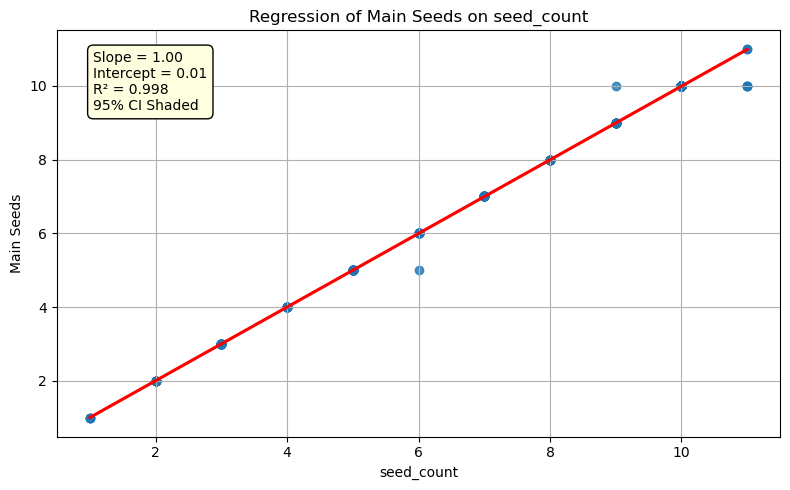

In [158]:

plot_regression_with_stats(merged_df, 'seed_count', 'Main Seeds')

In [159]:
#check if seed count is the same
merged_df['Seeds_left'] = merged_df['seed_count'] - merged_df['Main Seeds']
merged_df.head(4)

,class,seed_count,ID,Main Seeds,Seeds_left
0,Faba-Seed-CC_Vf257-1-1,5,Faba-Seed-CC_Vf257-1-1,5,0
1,Faba-Seed-CC_Vf115-1-2,10,Faba-Seed-CC_Vf115-1-2,10,0
2,Faba-Seed-CC_Vf575-1-1,6,Faba-Seed-CC_Vf575-1-1,6,0
3,Faba-Seed-CC_Vf152-1-1,10,Faba-Seed-CC_Vf152-1-1,10,0


In [160]:
# check for the ID with unequal seed count
filtered_df = merged_df[merged_df['Seeds_left'] != 0]
filtered_df

,class,seed_count,ID,Main Seeds,Seeds_left
44,Faba-Seed-CC_Vf178-1-1,11,Faba-Seed-CC_Vf178-1-1,10,1
324,Faba-Seed-CC_Vf620-1-1,9,Faba-Seed-CC_Vf620-1-1,10,-1
425,Faba-Seed-CC_Vf48-1-1,11,Faba-Seed-CC_Vf48-1-1,10,1
497,Faba-Seed-CC_Vf192-1-2,11,Faba-Seed-CC_Vf192-1-2,10,1
499,Faba-Seed-CC_Vf32-1-1,6,Faba-Seed-CC_Vf32-1-1,5,1
502,Faba-Seed-CC_Vf185-1-1,11,Faba-Seed-CC_Vf185-1-1,10,1


### Troubleshooting the errors in seed count
Vf178-seeds are circular in shape, a small part of coin detected as seed

Vf620 - typo error in groundtruth data itself

Vf48-small round part on the blue background paper

Vf192- seeds are rounded, a small part of coin has been detected

Vf32- a small round part from label detected as seed

Vf185-a small round part from label detected as seed

#### Sucess rate for pipeline

In [161]:
print ("Number of images with correct seed count with groundtruth: ",len(Org_Seeds)-len(filtered_df))
print ("Total number of images in groundtruth data= ", len(Org_Seeds))
print ("Number of images with incorrect number of seeds= ", len(filtered_df)-1)

Number of images with correct seed count with groundtruth:  535
Total number of images in groundtruth data=  541
Number of images with incorrect number of seeds=  5


In [162]:
Success_rate=100*((len(Org_Seeds)-len(filtered_df))/len(Org_Seeds))
Success_rate     
print (f"The faba bean feature extraction pipeline leveraging SAM2.1 has {Success_rate}% success rate.")

The faba bean feature extraction pipeline leveraging SAM2.1 has 98.8909426987061% success rate.


In [164]:
# read the .csv file containing the seed features data 

cwd = Path().resolve()
# 1️⃣ Find the folder named "Smp-UNet Pipeline" in the parent directory tree
pipeline_dirs = [
    p for p in cwd.parent.rglob("Smp-UNet Pipeline")
    if p.is_dir()
]
pipeline_dir = pipeline_dirs[0]
# 2️⃣ Find seed_features.csv inside that folder
csv_matches = list(pipeline_dir.rglob("seed_features.csv"))
csv_path = csv_matches[0]
# 3️⃣ Read the CSV
seed = pd.read_csv(csv_path)
seed.head(2)

,Area_mm2,Length_mm,Width_mm,Perimeter_mm,Area_pix,Axis_Major_Length_pix,Axis_Minor_Length_pix,Perimeter_pix,Eccentricity,Equivalent_Diameter,...,Roundness,Circularity_SAM,Shapefactor1,Shapefactor2,Shapefactor3,Shapefactor4,TGW_g,class,seed_id,px_to_mm
0,68.60411,10.456376,8.359903,29.242480,177.0,16.795493,13.428045,46.970563,0.600662,15.012108,...,1.008165,0.991901,0.094890,0.075865,0.798910,0.999258,474.576097,Faba-Seed-CC_Vf257-1-1,1,0.62257
1,81.78230,13.593052,7.687336,33.858349,211.0,21.833760,12.347739,54.384776,0.824725,16.390654,...,0.896474,1.115482,0.103478,0.058520,0.563554,0.996498,583.100789,Faba-Seed-CC_Vf257-1-1,2,0.62257


In [165]:
seed.columns

Index(['Area_mm2', 'Length_mm', 'Width_mm', 'Perimeter_mm', 'Area_pix',
       'Axis_Major_Length_pix', 'Axis_Minor_Length_pix', 'Perimeter_pix',
       'Eccentricity', 'Equivalent_Diameter', 'Solidity', 'Convex_Area',
       'Extent', 'Centroid_Row', 'Centroid_Col', 'Aspect_Ratio', 'Roundness',
       'Circularity_SAM', 'Shapefactor1', 'Shapefactor2', 'Shapefactor3',
       'Shapefactor4', 'TGW_g', 'class', 'seed_id', 'px_to_mm'],
      dtype='object')

In [168]:
# List of columns you want to keep
cols = [
    'Area_mm2', 'Length_mm', 'Width_mm', 
    'Perimeter_mm', 'Aspect_Ratio', 'Circularity_SAM', 
    'Shapefactor1', 'Shapefactor2', 'Shapefactor3', 'Shapefactor4', 
    'TGW_g', 'class'
]

# Create subset
seed_subset = seed[cols].set_index('class')

# Group by the index ('class') and sort within each group by 'Area_mm2_Agent'
seed_sorted = seed_subset.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values('Area_mm2'))

# Check the result
print(seed_sorted.head(2))


                         Area_mm2  Length_mm  Width_mm  Perimeter_mm  \
class                                                                  
Faba-Seed-CC_Vf257-1-1  45.348479   8.631955  6.713872     23.746163   
Faba-Seed-CC_Vf257-1-1  68.604110  10.456376  8.359903     29.242480   

                        Aspect_Ratio  Circularity_SAM  Shapefactor1  \
class                                                                 
Faba-Seed-CC_Vf257-1-1      1.285690         0.989497      0.118505   
Faba-Seed-CC_Vf257-1-1      1.250777         0.991901      0.094890   

                        Shapefactor2  Shapefactor3  Shapefactor4       TGW_g  
class                                                                         
Faba-Seed-CC_Vf257-1-1      0.092172      0.774916      0.996301  361.449628  
Faba-Seed-CC_Vf257-1-1      0.075865      0.798910      0.999258  474.576097  


In [169]:
# Sort the DataFrame by its index in increasing order
seed_sorted2 = seed_sorted.sort_index(ascending=True)

# Display the first few rows
print(seed_sorted2.head())

                          Area_mm2  Length_mm   Width_mm  Perimeter_mm  \
class                                                                    
Faba-Seed-CC_Vf1-1-2    179.494165  19.177454  11.956210     50.547933   
Faba-Seed-CC_Vf1-1-2    174.669053  16.778151  13.278731     48.007772   
Faba-Seed-CC_Vf1-1-2    149.578471  18.635710  10.221872     46.449965   
Faba-Seed-CC_Vf1-1-2    188.661878  19.316680  12.442130     51.361743   
Faba-Seed-CC_Vf100-1-2  137.088219  18.017481   9.723259     44.802820   

                        Aspect_Ratio  Circularity_SAM  Shapefactor1  \
class                                                                 
Faba-Seed-CC_Vf1-1-2        1.603974         1.132783      0.074215   
Faba-Seed-CC_Vf1-1-2        1.263536         1.050019      0.066724   
Faba-Seed-CC_Vf1-1-2        1.823121         1.147868      0.086543   
Faba-Seed-CC_Vf1-1-2        1.552522         1.112719      0.071122   
Faba-Seed-CC_Vf100-1-2      1.853029         1.165201  

In [170]:
# Extract the value after the last underscore for column ``ÎD`` for column ``Class``
seed_sorted2["ID"] = seed_sorted2.index.str.split('_').str[-1]

# print the first 2 rows of df
print (seed_sorted2.head(2))

                        Area_mm2  Length_mm   Width_mm  Perimeter_mm  \
class                                                                  
Faba-Seed-CC_Vf1-1-2  179.494165  19.177454  11.956210     50.547933   
Faba-Seed-CC_Vf1-1-2  174.669053  16.778151  13.278731     48.007772   

                      Aspect_Ratio  Circularity_SAM  Shapefactor1  \
class                                                               
Faba-Seed-CC_Vf1-1-2      1.603974         1.132783      0.074215   
Faba-Seed-CC_Vf1-1-2      1.263536         1.050019      0.066724   

                      Shapefactor2  Shapefactor3  Shapefactor4        TGW_g  \
class                                                                         
Faba-Seed-CC_Vf1-1-2      0.046270       0.62141      0.996726  1035.337204   
Faba-Seed-CC_Vf1-1-2      0.052807       0.79002      0.998218  1008.057518   

                           ID  
class                          
Faba-Seed-CC_Vf1-1-2  Vf1-1-2  
Faba-Seed-CC_Vf1-1-2 

In [171]:
# delete the column ``Class``
seed_sorted2=seed_sorted2.reset_index(drop=True).set_index("ID").sort_index()

In [172]:
seed_sorted2.head(2)

,Area_mm2,Length_mm,Width_mm,Perimeter_mm,Aspect_Ratio,Circularity_SAM,Shapefactor1,Shapefactor2,Shapefactor3,Shapefactor4,TGW_g
ID,,,,,,,,,,,
Vf1-1-2,179.494165,19.177454,11.956210,50.547933,1.603974,1.132783,0.074215,0.046270,0.62141,0.996726,1035.337204
Vf1-1-2,174.669053,16.778151,13.278731,48.007772,1.263536,1.050019,0.066724,0.052807,0.79002,0.998218,1008.057518


### Groundtruth data sheet

In [174]:
GT_data = pd.read_excel("../../helper_scripts/Groundtruth_data/Faba_Seed_Analyzer_Data_August_2024.xlsx", sheet_name="Individual S2 Seed Data")
GT_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            4047 non-null   object 
 1   Length(mm)    4047 non-null   float64
 2   Width(mm)     4047 non-null   float64
 3   Area(mm²)     4047 non-null   float64
 4   Area(pix)     4047 non-null   float64
 5   NC_1          4047 non-null   float64
 6   Circularity   4047 non-null   float64
 7   L/W Ratio     4047 non-null   float64
 8   Unnamed: 8    0 non-null      float64
 9   Length(mm).1  77 non-null     object 
 10  Width(mm).1   76 non-null     float64
 11  Unnamed: 11   0 non-null      float64
 12  Length(mm).2  1021 non-null   object 
 13  Width(mm).2   1019 non-null   object 
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   1 non-null      object 
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   3 non-null      object 
 18  Unnamed: 18   2 non-null    

In [175]:
# For machine measured data, create a new df from this df containing the machine measured data and drop the column 'NC_1' (Unnecessary)
GT_data=GT_data.iloc[:,:8]
GT_data=GT_data.drop("NC_1", axis=1)
GT_data.head(2)

,ID,Length(mm),Width(mm),Area(mm²),Area(pix),Circularity,L/W Ratio
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Vf1-1-2,21.09744,14.532204,241.729082,34121.0,1.17374,1.451772


In [176]:
#drop the first row

GT_data=GT_data.drop([0], axis=0)
# Set 'ID' as the index
GT_data = GT_data.set_index('ID')
GT_data.head(2)

,Length(mm),Width(mm),Area(mm²),Area(pix),Circularity,L/W Ratio
ID,,,,,,
Vf1-1-2,21.097440,14.532204,241.729082,34121.0,1.173740,1.451772
Vf1-1-2,19.485046,14.386841,219.192047,30962.0,1.173565,1.354366


In [177]:
GT_data.columns

Index(['Length(mm)', 'Width(mm)', 'Area(mm²)', 'Area(pix)', 'Circularity',
       'L/W Ratio'],
      dtype='object')

In [178]:
GT_data.index = GT_data.index.str.capitalize()

In [179]:
GT_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4047 entries, Vf1-1-2 to Vf224-3-2
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Length(mm)   4047 non-null   float64
 1   Width(mm)    4047 non-null   float64
 2   Area(mm²)    4047 non-null   float64
 3   Area(pix)    4047 non-null   float64
 4   Circularity  4047 non-null   float64
 5   L/W Ratio    4047 non-null   float64
dtypes: float64(6)
memory usage: 221.3+ KB


In [180]:
# Group by the index (which is now 'ID') and sort within each group by 'Area(mm²)'
GT_data_sorted = GT_data.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values('Area(mm²)'))

In [181]:
# Sort the DataFrame by its index in increasing order
GT_sorted2 = GT_data_sorted.sort_index(ascending=True)
# Display the first few rows
print(GT_sorted2.head())

           Length(mm)  Width(mm)   Area(mm²)  Area(pix)  Circularity  \
ID                                                                     
Vf1-1-2     17.850534  13.820892  186.338789    26346.0     1.162423   
Vf1-1-2     19.485046  14.386841  219.192047    30962.0     1.173565   
Vf1-1-2     19.970481  14.518098  230.741071    32586.0     1.162884   
Vf1-1-2     21.097440  14.532204  241.729082    34121.0     1.173740   
Vf100-1-2   14.194330  12.339481  128.114841    18140.0     1.169269   

           L/W Ratio  
ID                    
Vf1-1-2     1.291562  
Vf1-1-2     1.354366  
Vf1-1-2     1.375558  
Vf1-1-2     1.451772  
Vf100-1-2   1.150318  


In [182]:
#filter the rows to match indices and align them
print (len(GT_sorted2.index)==len(seed_sorted2.index))
print ("The length of GT index is : ", len(GT_sorted2.index))
print ("The length of workflow_seed index is : ", len(seed_sorted2.index))

False
The length of GT index is :  4047
The length of workflow_seed index is :  4249


In [183]:
# check for the unique index
GT_sorted2.index.unique()

Index(['Vf1-1-2', 'Vf100-1-2', 'Vf101-1-3', 'Vf102-1-3', 'Vf103-1-2',
       'Vf104-1-2', 'Vf106-1-2', 'Vf107-1-3', 'Vf108-1-1', 'Vf109-1-1',
       ...
       'Vf89-1-1', 'Vf9-1-1', 'Vf90-1-1', 'Vf91-1-1', 'Vf94-1-2', 'Vf95-1-2',
       'Vf96-1-2', 'Vf97-1-2', 'Vf98-1-2', 'Vf99-4-1'],
      dtype='object', name='ID', length=531)

In [184]:
# check for the unique index
seed_sorted2.index.unique()

Index(['Vf1-1-2', 'Vf100-1-2', 'Vf101-1-3', 'Vf102-1-3', 'Vf103-1-2',
       'Vf104-1-2', 'Vf106-1-2', 'Vf107-1-3', 'Vf108-1-1', 'Vf109-1-1',
       ...
       'Vf90-1-1', 'Vf91-1-1', 'Vf92-1-1', 'Vf93-1-2', 'Vf94-1-2', 'Vf95-1-2',
       'Vf96-1-2', 'Vf97-1-2', 'Vf98-1-2', 'Vf99-4-1'],
      dtype='object', name='ID', length=554)

In [186]:
#Use groupby to count the index for a class
g_c=GT_sorted2.groupby(GT_sorted2.index)["Length(mm)"].count()
#convert it to dataframe
g_c=pd.DataFrame(g_c)
print (g_c)

#Use groupby to count the index for a class
Seed_WF=seed_sorted2.groupby(seed_sorted2.index)["Length_mm"].count()
#Use groupby to count the index for a class
Seed_WF=pd.DataFrame(Seed_WF)
print (Seed_WF)


           Length(mm)
ID                   
Vf1-1-2             4
Vf100-1-2          10
Vf101-1-3          10
Vf102-1-3          10
Vf103-1-2          10
...               ...
Vf95-1-2            6
Vf96-1-2           10
Vf97-1-2            6
Vf98-1-2            3
Vf99-4-1           10

[531 rows x 1 columns]
           Length_mm
ID                  
Vf1-1-2            4
Vf100-1-2         10
Vf101-1-3         10
Vf102-1-3         10
Vf103-1-2         10
...              ...
Vf95-1-2           6
Vf96-1-2          10
Vf97-1-2           6
Vf98-1-2           3
Vf99-4-1          10

[554 rows x 1 columns]


In [187]:
# Get a mask of df2 rows whose index is in df1
mask = Seed_WF.index.isin(g_c.index)

# Select only those rows
df2_subset = Seed_WF.loc[mask]

# Optional: sort df2_subset to match the order of df1's index
df2_subset = df2_subset.loc[g_c.index.intersection(Seed_WF.index, sort=False)]

# Check the result
print(df2_subset.head())


           Length_mm
ID                  
Vf1-1-2            4
Vf100-1-2         10
Vf101-1-3         10
Vf102-1-3         10
Vf103-1-2         10


In [188]:
df2_subset

,Length_mm
ID,
Vf1-1-2,4
Vf100-1-2,10
Vf101-1-3,10
Vf102-1-3,10
Vf103-1-2,10
...,...
Vf95-1-2,6
Vf96-1-2,10
Vf97-1-2,6


In [189]:
# Align df1 to df2's index
df1_aligned = g_c.loc[df2_subset.index]

# Concatenate using df2's index
df_concat = pd.concat([df2_subset, df1_aligned], axis=1)

print(df_concat.head())


           Length_mm  Length(mm)
ID                              
Vf1-1-2            4           4
Vf100-1-2         10          10
Vf101-1-3         10          10
Vf102-1-3         10          10
Vf103-1-2         10          10


In [190]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528 entries, Vf1-1-2 to Vf99-4-1
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Length_mm   528 non-null    int64
 1   Length(mm)  528 non-null    int64
dtypes: int64(2)
memory usage: 12.4+ KB


In [193]:
com=df_concat.copy()
com=com.rename(columns={"Length(mm)":"Seed count(MM)", "Length_mm":"Seed count(Seed)"})

In [194]:
# Create a new df containing the remaining missing seed number
com['seeds left']=com['Seed count(MM)']-com['Seed count(Seed)']
com.head(2)

,Seed count(Seed),Seed count(MM),seeds left
ID,,,
Vf1-1-2,4,4,0
Vf100-1-2,10,10,0


In [195]:
com.index[com['seeds left'] != 0]

Index(['Vf178-1-1', 'Vf185-1-1', 'Vf192-1-2', 'Vf32-1-1', 'Vf48-1-1',
       'Vf620-1-1'],
      dtype='object', name='ID')

In [196]:
com1=com.drop(['Vf178-1-1', 'Vf185-1-1', 'Vf192-1-2', 'Vf32-1-1', 'Vf48-1-1','Vf620-1-1'], axis='index')
com1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, Vf1-1-2 to Vf99-4-1
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Seed count(Seed)  522 non-null    int64
 1   Seed count(MM)    522 non-null    int64
 2   seeds left        522 non-null    int64
dtypes: int64(3)
memory usage: 16.3+ KB


In [197]:
com1.index

Index(['Vf1-1-2', 'Vf100-1-2', 'Vf101-1-3', 'Vf102-1-3', 'Vf103-1-2',
       'Vf104-1-2', 'Vf106-1-2', 'Vf107-1-3', 'Vf108-1-1', 'Vf109-1-1',
       ...
       'Vf89-1-1', 'Vf9-1-1', 'Vf90-1-1', 'Vf91-1-1', 'Vf94-1-2', 'Vf95-1-2',
       'Vf96-1-2', 'Vf97-1-2', 'Vf98-1-2', 'Vf99-4-1'],
      dtype='object', name='ID', length=522)

In [198]:
# Subset df1 to keep only rows whose index is present in df2
g_c1 = GT_sorted2.loc[GT_sorted2.index.isin(com1.index)]

print(g_c1.head())


           Length(mm)  Width(mm)   Area(mm²)  Area(pix)  Circularity  \
ID                                                                     
Vf1-1-2     17.850534  13.820892  186.338789    26346.0     1.162423   
Vf1-1-2     19.485046  14.386841  219.192047    30962.0     1.173565   
Vf1-1-2     19.970481  14.518098  230.741071    32586.0     1.162884   
Vf1-1-2     21.097440  14.532204  241.729082    34121.0     1.173740   
Vf100-1-2   14.194330  12.339481  128.114841    18140.0     1.169269   

           L/W Ratio  
ID                    
Vf1-1-2     1.291562  
Vf1-1-2     1.354366  
Vf1-1-2     1.375558  
Vf1-1-2     1.451772  
Vf100-1-2   1.150318  


In [199]:
# Subset df1 to keep only rows whose index is present in df2
seed_c1 = seed_sorted2.loc[seed_sorted2.index.isin(com1.index)]

print(seed_c1.head())


             Area_mm2  Length_mm   Width_mm  Perimeter_mm  Aspect_Ratio  \
ID                                                                        
Vf1-1-2    179.494165  19.177454  11.956210     50.547933      1.603974   
Vf1-1-2    174.669053  16.778151  13.278731     48.007772      1.263536   
Vf1-1-2    149.578471  18.635710  10.221872     46.449965      1.823121   
Vf1-1-2    188.661878  19.316680  12.442130     51.361743      1.552522   
Vf100-1-2  137.088219  18.017481   9.723259     44.802820      1.853029   

           Circularity_SAM  Shapefactor1  Shapefactor2  Shapefactor3  \
ID                                                                     
Vf1-1-2           1.132783      0.074215      0.046270      0.621410   
Vf1-1-2           1.050019      0.066724      0.052807      0.790020   
Vf1-1-2           1.147868      0.086543      0.047470      0.548387   
Vf1-1-2           1.112719      0.071122      0.045810      0.643768   
Vf100-1-2         1.165201      0.092796  

In [200]:
g_c1.info()
seed_c1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3965 entries, Vf1-1-2 to Vf99-4-1
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Length(mm)   3965 non-null   float64
 1   Width(mm)    3965 non-null   float64
 2   Area(mm²)    3965 non-null   float64
 3   Area(pix)    3965 non-null   float64
 4   Circularity  3965 non-null   float64
 5   L/W Ratio    3965 non-null   float64
dtypes: float64(6)
memory usage: 216.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 3965 entries, Vf1-1-2 to Vf99-4-1
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area_mm2         3965 non-null   float64
 1   Length_mm        3965 non-null   float64
 2   Width_mm         3965 non-null   float64
 3   Perimeter_mm     3965 non-null   float64
 4   Aspect_Ratio     3965 non-null   float64
 5   Circularity_SAM  3965 non-null   float64
 6   Shapefactor1     3965 non

In [201]:
df_2 = pd.concat([g_c1, seed_c1], axis=1)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3965 entries, Vf1-1-2 to Vf99-4-1
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Length(mm)       3965 non-null   float64
 1   Width(mm)        3965 non-null   float64
 2   Area(mm²)        3965 non-null   float64
 3   Area(pix)        3965 non-null   float64
 4   Circularity      3965 non-null   float64
 5   L/W Ratio        3965 non-null   float64
 6   Area_mm2         3965 non-null   float64
 7   Length_mm        3965 non-null   float64
 8   Width_mm         3965 non-null   float64
 9   Perimeter_mm     3965 non-null   float64
 10  Aspect_Ratio     3965 non-null   float64
 11  Circularity_SAM  3965 non-null   float64
 12  Shapefactor1     3965 non-null   float64
 13  Shapefactor2     3965 non-null   float64
 14  Shapefactor3     3965 non-null   float64
 15  Shapefactor4     3965 non-null   float64
 16  TGW_g            3965 non-null   float64
dtypes: float6

## Comparison studies of different parameters as measured by Smp-Unet and Groundtruth

In [202]:
def compare_columns(df, colA, colB, plot_title_suffix=""):
    """
    Compare two columns: ground truth (colA) and predicted/measurement (colB)
    Computes error metrics, Bland–Altman, Cohen's d, and regression + correlation.

    Parameters:
    df : pandas.DataFrame
        Input DataFrame
    colA : str
        Column name for ground truth
    colB : str
        Column name for predicted / measured values
    plot_title_suffix : str
        Optional suffix for plot titles
    """
    # --- Compute errors ---
    error = df[colB] - df[colA]
    abs_error = error.abs()
    sq_error = error ** 2

    summary_dict = {
        'Metric': [
            'Mean Absolute Error (MAE)',
            'Root Mean Squared Error (RMSE)',
            'Mean Bias (B − A)',
            'Mean Absolute Percentage Error (MAPE, %)',
            'R² (Coefficient of Determination)',
            'Number of Samples (n)'
        ],
        'Value': [
            abs_error.mean(),
            np.sqrt(sq_error.mean()),
            error.mean(),
            (abs_error / df[colA]).replace([np.inf, -np.inf], np.nan).mean() * 100,
            r2_score(df[colA], df[colB]),
            len(df)
        ]
    }

    summary_table = pd.DataFrame(summary_dict)
    summary_table['Value'] = summary_table['Value'].round(4)
    print("\nSummary Table:")
    print(summary_table)

    # --- Bland–Altman plot ---
    diff = error
    mean_vals = (df[colA] + df[colB]) / 2

    mean_diff = diff.mean()
    std_diff = diff.std()
    loa_upper = mean_diff + 1.96 * std_diff
    loa_lower = mean_diff - 1.96 * std_diff

    plt.figure()
    plt.scatter(mean_vals, diff)
    plt.axhline(mean_diff, linestyle='--', label='Mean Bias')
    plt.axhline(loa_upper, linestyle='--', label='+1.96 SD')
    plt.axhline(loa_lower, linestyle='--', label='-1.96 SD')
    plt.xlabel(f'Mean of {colA} and {colB}')
    plt.ylabel(f'Difference ({colB} − {colA})')
    plt.title(f'Bland–Altman Plot: {plot_title_suffix}')
    plt.legend()
    plt.show()

    # --- Cohen's d ---
    mean_A = df[colA].mean()
    mean_B = df[colB].mean()
    std_A = df[colA].std()
    std_B = df[colB].std()
    pooled_std = np.sqrt((std_A**2 + std_B**2) / 2)
    cohens_d = (mean_B - mean_A) / pooled_std
    print(f"Cohen's d: {cohens_d:.4f}")

    # --- Regression + correlation plot ---
    X = df[colA]
    Y = df[colB]
    X_sm = sm.add_constant(X)
    model = sm.OLS(Y, X_sm).fit()
    intercept, slope = model.params
    pearson_r = X.corr(Y)

    plt.figure(figsize=(6,5))
    sns.regplot(x=X, y=Y, ci=95, line_kws={'color':'red', 'label':'Regression Line'})
    plt.text(
        0.05, 0.95,
        f"y = {intercept:.2f} + {slope:.2f}x\nr = {pearson_r:.3f}",
        transform=plt.gca().transAxes,
        fontsize=10,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
    )
    plt.xlabel('Ground Truth')
    plt.ylabel('Predicted / Measured')
    plt.title(f'{colB} vs {colA}: {plot_title_suffix}')
    plt.legend()
    plt.show()


In [203]:
df_2.columns


Index(['Length(mm)', 'Width(mm)', 'Area(mm²)', 'Area(pix)', 'Circularity',
       'L/W Ratio', 'Area_mm2', 'Length_mm', 'Width_mm', 'Perimeter_mm',
       'Aspect_Ratio', 'Circularity_SAM', 'Shapefactor1', 'Shapefactor2',
       'Shapefactor3', 'Shapefactor4', 'TGW_g'],
      dtype='object')


Summary Table:
                                     Metric      Value
0                 Mean Absolute Error (MAE)     1.7631
1            Root Mean Squared Error (RMSE)     2.3767
2                         Mean Bias (B − A)     0.0285
3  Mean Absolute Percentage Error (MAPE, %)    12.5674
4         R² (Coefficient of Determination)     0.6192
5                     Number of Samples (n)  3965.0000


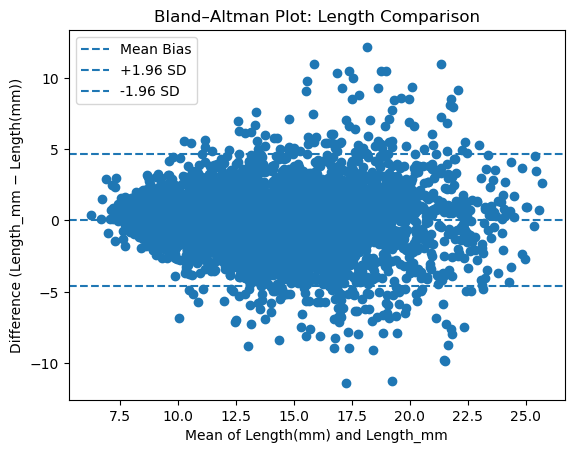

Cohen's d: 0.0075


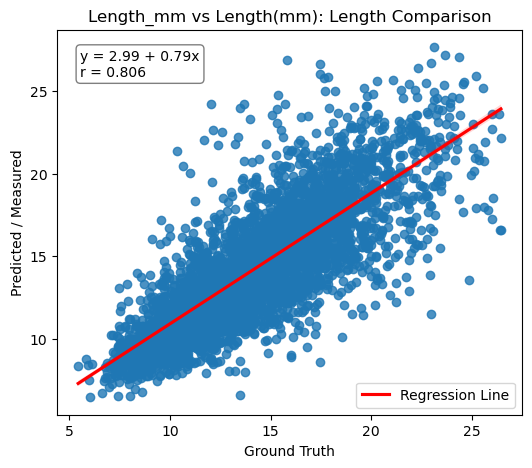


Summary Table:
                                     Metric      Value
0                 Mean Absolute Error (MAE)     1.8913
1            Root Mean Squared Error (RMSE)     2.3410
2                         Mean Bias (B − A)    -1.6422
3  Mean Absolute Percentage Error (MAPE, %)    16.8844
4         R² (Coefficient of Determination)     0.2407
5                     Number of Samples (n)  3965.0000


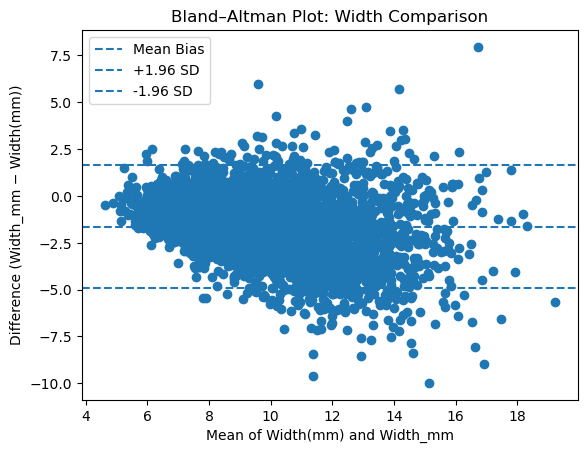

Cohen's d: -0.6703


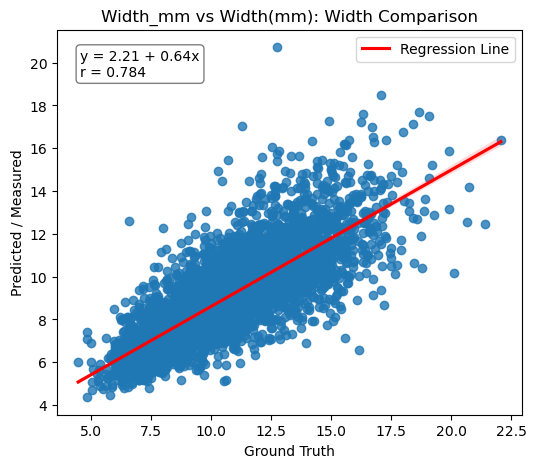


Summary Table:
                                     Metric      Value
0                 Mean Absolute Error (MAE)    27.3305
1            Root Mean Squared Error (RMSE)    39.6922
2                         Mean Bias (B − A)   -18.9609
3  Mean Absolute Percentage Error (MAPE, %)    20.4566
4         R² (Coefficient of Determination)     0.6192
5                     Number of Samples (n)  3965.0000


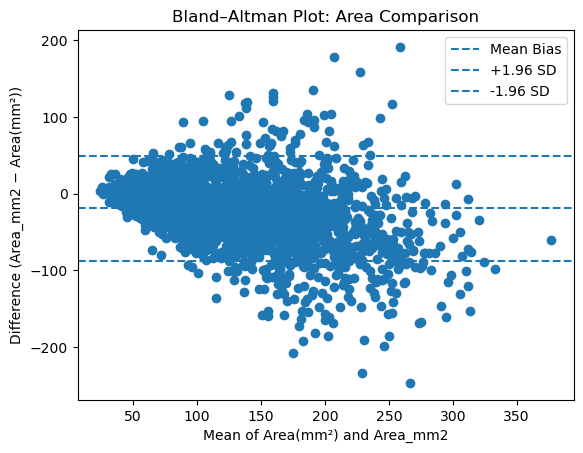

Cohen's d: -0.3295


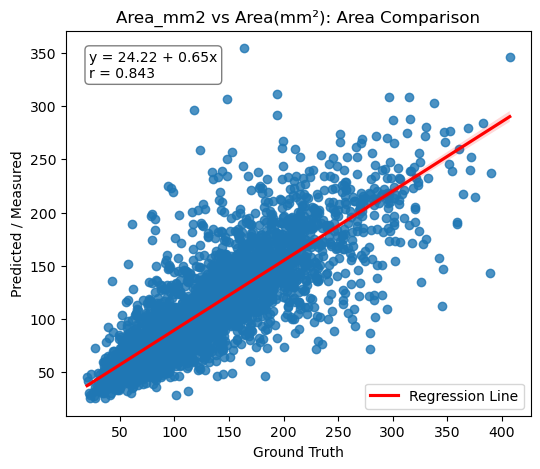


Summary Table:
                                     Metric      Value
0                 Mean Absolute Error (MAE)     0.0954
1            Root Mean Squared Error (RMSE)     0.1153
2                         Mean Bias (B − A)    -0.0859
3  Mean Absolute Percentage Error (MAPE, %)     8.1056
4         R² (Coefficient of Determination)   -16.7477
5                     Number of Samples (n)  3965.0000


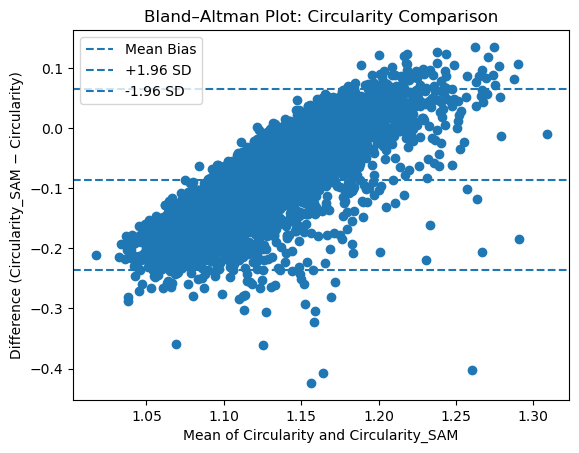

Cohen's d: -1.4756


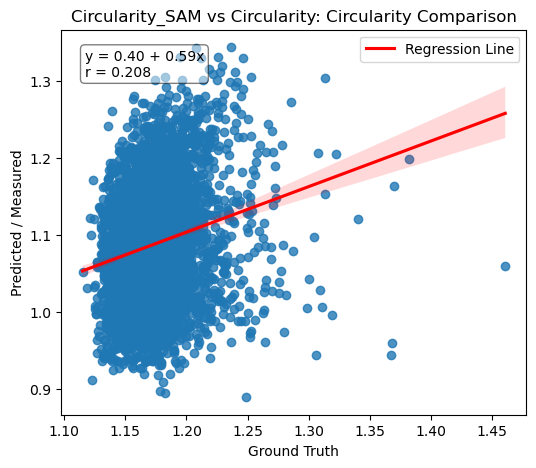


Summary Table:
                                     Metric      Value
0                 Mean Absolute Error (MAE)     0.3313
1            Root Mean Squared Error (RMSE)     0.3898
2                         Mean Bias (B − A)     0.2643
3  Mean Absolute Percentage Error (MAPE, %)    25.1262
4         R² (Coefficient of Determination)   -10.1455
5                     Number of Samples (n)  3965.0000


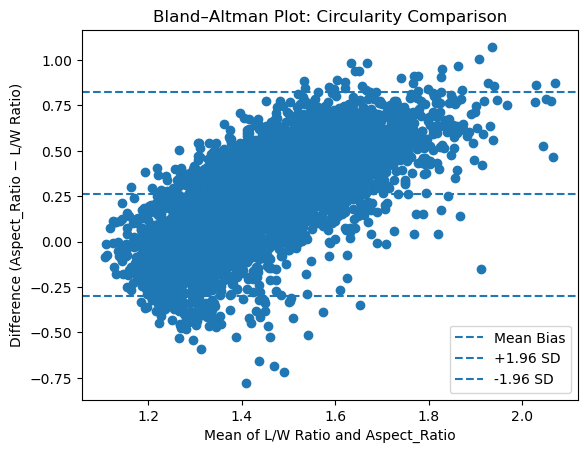

Cohen's d: 1.2246


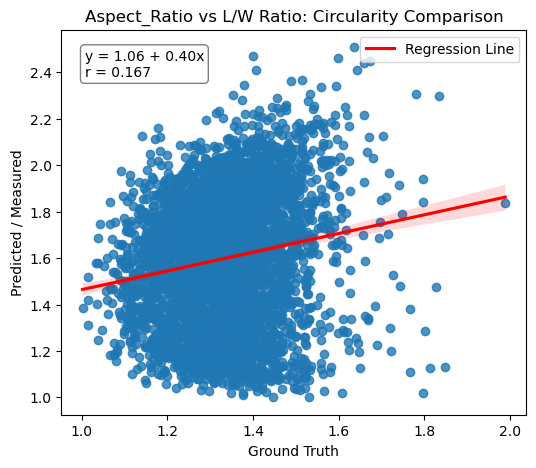

In [205]:
# Length comparison
compare_columns(
    df=df_2,
    colA='Length(mm)',
    colB='Length_mm',
    plot_title_suffix='Length Comparison'
)

# Width comparison
compare_columns(
    df=df_2,
    colA='Width(mm)',
    colB='Width_mm',
    plot_title_suffix='Width Comparison'
)

# Area comparison
compare_columns(
    df=df_2,
    colA='Area(mm²)',
    colB='Area_mm2',
    plot_title_suffix='Area Comparison'
)

# Circularity Comparison
compare_columns(
    df=df_2,
    colA='Circularity',
    colB='Circularity_SAM',
    plot_title_suffix='Circularity Comparison'
)

# Aspect ratio Comparison
compare_columns(
    df=df_2,
    colA='L/W Ratio',
    colB='Aspect_Ratio',
    plot_title_suffix='Circularity Comparison'
)